# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: July 13, 2022
* Student Name: Ami Kano
* Student Net ID: ak7ra
* This URL: https://github.com/ak7ra/Monte_Carlo_Simulator/blob/main/FinalProjectSubmission.ipynb
* GitHub Repo URL: https://github.com/ak7ra/Monte_Carlo_Simulator

# The Monte Carlo Module

In [1]:
import numpy as np
import random
import pandas as pd

class Die:
    
    '''
    The Die object takes in an array or list of values and creates a die. 
    Each value in the input array/list becomes a face of the created die.
     
    Attributes
    ----------
    None
    '''
    
    def __init__(self, faces):
        '''
        Parameters
        ----------
        faces : numpy array or list
            faces is an numpy array or list of type str or int. It can be of any length.

        '''
        faces = np.array(faces)
        self._faces_and_weights = pd.DataFrame(data = faces, columns = ["Faces"], index = range(len(faces)))
        self._faces_and_weights["Weights"] = np.array([1.0 for i in range(len(faces))])
    
    def change_weight(self, face, new_weight):
        '''
        A method to change the weight of a single side.

        Parameters
        ----------
        face : str or int
            face of which the weight will be changed
        new_weight : float
            the resulting weight of the face

        Raises
        ------
        ValueError
            if new_weight is not a float or convertible to float, change_weight will throw this error.
            if face is not on the die, change_weight will throw this error.

        Returns
        -------
        None
        '''
        if not (face in list(self._faces_and_weights['Faces'])):
            raise ValueError("Face value does not exist.")
        else:
            self._faces_and_weights.loc[self._faces_and_weights['Faces'] == face, "Weights"] = float(new_weight)
    
    
    def roll(self, roll_num=1):        
        '''
        A method to roll the die one or more times.

        Parameters
        ----------
        roll_num : int
            int type parameter of how many times the die is to be rolled; defaults to 1.

        Returns
        -------
        result : list
            list of outcomes of the rolls.
        '''
        result = random.choices(self._faces_and_weights["Faces"].values, weights=self._faces_and_weights["Weights"].values, k=roll_num)
        return result
    
    def show_faces_weights(self):
        '''
        A method to show the dataframe consisting of faces and weights of the die.
        
        Returns
        -------
        the pandas dataframe consisting of faces and weights of the die
        '''
        return self._faces_and_weights
    
#-------------------------------------------------------------
    
class Game:
    
    '''
    The Game object takes in a list of die to make a game. 
    A game consists of rolling of one or more dice of the same kind one or more times.
     
    Attributes
    ----------
    None
    '''
    
    def __init__(self, list_of_die):
        '''
        Parameters
        ----------
        list_of_die : list
            list_of_die is a list containing objects of the Die type. It can be of any length.

        '''
        self._result = pd.DataFrame()
        self._list_of_die = list_of_die
    
    def play(self, rolls):
        '''
        A method to play the game; roll each die for a certain amount of time.

        Parameters
        ----------
        rolls : int
            int type parameter of how many times each die is to be rolled.

        Returns
        -------
        None
        '''
        self._result = pd.DataFrame()
        for i in range(len(self._list_of_die)):
            new_res = pd.DataFrame(self._list_of_die[i].roll(rolls))
            new_res.index = [num+1 for num in range(rolls)]
            new_res.index.name = "Roll Number"
            new_res.columns = [i+1]
            new_res.columns.name = "Die Number"
            self._result = pd.concat([self._result, new_res], axis=1)

    def show_result(self, form="wide"):
        '''
        A method to return the dataframe including the most recent result from the play method.

        Parameters
        ----------
        form : string
            String parameter to determine the format of the returned dataframe. Takes either "narrow" or "wide". 
            Defaults to "wide"

        Raises
        ------
        ValueError
            if the value of the variable form is not "narrow" or "wide", show_result will throw this error.

        Returns
        -------
        Pandas dataframe including the most recent result from the play method. 
        Shows the roll number, the die number and the face rolled for each roll.
        '''
        if not (form=="wide" or form=="narrow"):
            raise ValueError("Variable \"form\" must have value of \"wide\" or \"narrow\"")
            return
        elif form=="wide":
            return self._result
        elif form=="narrow":
            return self._result.stack().to_frame().rename(columns={0:"Face Rolled"})
        

#-------------------------------------------------------------
        
class Analyzer:
    
    '''
    The Analyzer object takes in a game object and analyzes its results.
     
    Attributes
    ----------
    jackpot_count : int
        jackpot_count is an int type attribute that contains the amount of jackpots in the results of the game.
        Defaults to 0. Updated to correct amount when jackpot() is called.
    jackpot_dataframe : pandas dataframe
        jackpot_dataframe is a pandas dataframe that contains the rows in which there are jackpots.
        Defaults to an empty dataframe. Updated to correct data when jackpot() is called.
    combo_frame : pandas dataframe
        combo_frame is a pandas dataframe that contains all combinations of the rolled face value, along with their occurrence.
        Defaults to an empty dataframe. Updated to correct data when combo() is called.
    face_count : pandas dataframe
        face_count is a pandas dataframe that counts the occurrence of each face value in each roll.
        Defaults to an empty dataframe. Updated to correct data when face_counts() is called.
    die_type : string
        die_type is a string type attribute. It stores the string specifying the type of face values of the dice.
    '''
    
    def __init__(self, game):
        """
        Parameters
        ----------
        game : Game
            game is a Game object.
   
        """
        self._game = game
        self.jackpot_count = 0
        self.jackpot_dataframe = pd.DataFrame()
        self.combo_frame = pd.DataFrame()
        self.face_count = pd.DataFrame()
        self.die_type = type(game._list_of_die[0])
        
    def jackpot(self):
        '''
        A method to count the occurrence of jackpots in the game.

        Parameters
        ----------
        None

        Returns
        -------
        Pandas dataframe including the rows in which there were jackpots. 
        Shows the roll number, the die number and the face rolled for each roll.
        '''
        self.jackpot_dataframe = pd.DataFrame()
        for i in range(1, self._game.show_result().T.shape[1]+1):
            if ((len(set(self._game.show_result().loc[[i]].values[0].flatten())))==1):
                temp = self._game.show_result().loc[[i]]
                self.jackpot_dataframe = pd.concat([self.jackpot_dataframe, temp], axis=0)
        self.jackpot_count = self.jackpot_dataframe.shape[0]
        return self.jackpot_count
    
    def combo(self, permutation=False):
        '''
        A method to return the dataframe that contains all combinations of the rolled face value, along with their occurrence.

        Parameters
        ----------
        permutation : Boolean
            Boolean parameter to determine whether the function would count permutations instead of combinations.
            Defaults to False.

        Returns
        -------
        Pandas dataframe including all combinations or permutations from a game. 
        The face values are turned into multi-indexes. The column shows the occurrences of each combination/permutation.
        '''
        self.combo_frame = pd.DataFrame()
        if permutation:
            new_names = ["#"+str(i)+" die's value" for i in range(1, len(self._game._list_of_die)+1)]
            temp_df = self._game.show_result()
            temp_df.columns = new_names
            x = list(range(len(self._game._list_of_die)))
            return temp_df.set_index(new_names).sort_index().groupby(level=x).size().to_frame("Occurence")
        else:
            self.combo_frame = self._game.show_result().apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('Occurrence')
            self.combo_frame.index.names = ["Face Value #"+str(i) for i in range(1, len(self._game._list_of_die)+1)]
            return self.combo_frame
    
    
    def face_counts(self):
        '''
        A method to return the dataframe that counts the occurrence of each face value in each roll.

        Parameters
        ----------
        None

        Returns
        -------
        Pandas dataframe including the counts of the occurrence of each face value in each roll.
        The indexes indicate the roll number, and the columns indicate the face values of the dice.
        '''
        self.face_count = self._game.show_result().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        self.face_count.columns.name = "Face of Die"
        return self.face_count
        

# Test Module

In [ ]:
import unittest
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import pandas.testing as pdt

class SimulatorClassesTestCase(unittest.TestCase): 
    
    def test_change_weight_happypath(self):
        """
        This test tests the change_weight() function with the correct input values.
        """
        die = Die([1,2,3,4,5,6])
        die.change_weight(3, 4.0)
        expected = 4
        actual = die.show_faces_weights().loc[die.show_faces_weights()['Faces'] == 3, "Weights"].values[0]
        self.assertEqual(expected, actual)

    def test_change_weight_face_not_exist(self):
        """
        This test tests the change_weight() function with with an incorrect face value.
        """
        die = Die([1,2,3,4,5,6])
        with self.assertRaises(ValueError):
            die.change_weight(7, 4.0)
        
    def test_change_weight_not_float(self):
        """
        This test tests the change_weight() function with an incorrect weight value.
        """
        die = Die([1,2,3,4,5,6])
        with self.assertRaises(ValueError):
            die.change_weight(1, "Hi")

    def test_roll_one(self):
        """
        This test tests the roll() function with the default parameter value.
        """
        die = Die([1,2,3,4,5,6])
        expected = 1
        actual = len(die.roll())
        self.assertEqual(expected, actual)
        
    def test_roll_multiple(self):
        """
        This test tests the roll() function with the non-default parameter value.
        """
        die = Die([1,2,3,4,5,6])
        expected = 5
        actual = len(die.roll(5))
        self.assertEqual(expected, actual)
        
    def test_show_faces_weights(self):
        """
        This test tests the show_faces_weights() function.
        """
        die = Die([1,2,3,4,5,6])
        expected_dataframe = pd.DataFrame({"Faces":[1,2,3,4,5,6], "Weights":[1.0,1.0,1.0,1.0,1.0,1.0]})
        actual_dataframe = die.show_faces_weights()
        pdt.assert_frame_equal(expected_dataframe, actual_dataframe)
        
    def test_play(self):
        """
        This test tests the play() function.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        expected_rows = 100
        actual_rows = game.show_result().shape[0]
        self.assertEqual(expected_rows, actual_rows)
        expected_columns = 3
        actual_columns = game.show_result().shape[1]
        self.assertEqual(expected_columns, actual_columns)
    
    def test_show_results_wide(self):
        """
        This test tests the show_results() function with "wide" as the form parameter.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        expected_rows = 100
        actual_rows = game.show_result(form="wide").shape[0]
        self.assertEqual(expected_rows, actual_rows)
        expected_columns = 3
        actual_columns = game.show_result(form="wide").shape[1]
        self.assertEqual(expected_columns, actual_columns)
        
    def test_show_results_narrow(self):
        """
        This test tests the show_results() function with "narrow" as the form parameter.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        expected_rows = 300
        actual_rows = game.show_result(form="narrow").shape[0]
        self.assertEqual(expected_rows, actual_rows)
        expected_columns = 1
        actual_columns = game.show_result(form="narrow").shape[1]
        self.assertEqual(expected_columns, actual_columns)
        
    def test_show_results_wrong_input(self):
        """
        This test tests the show_results() function with an inncorrect input in the form parameter.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        with self.assertRaises(ValueError):
            game.show_result(form="foo")

    
    def test_jackpot(self):
        """
        This test tests the jackpot() function.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        analyzer = Analyzer(game)
        jackpot_amt = analyzer.jackpot()
        jackpot_dataframe_rows = analyzer.jackpot_dataframe.shape[0]
        self.assertEqual(jackpot_amt, jackpot_dataframe_rows)
        
    def test_combo(self):
        """
        This test tests the combo() function with default parameters.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        analyzer = Analyzer(game)
        combo_dataframe = analyzer.combo()
        expected_amt_of_col = 1
        actual_amt_of_col = combo_dataframe.shape[1]
        self.assertEqual(expected_amt_of_col, actual_amt_of_col)
        expected_amt_of_index = 3
        actual_amt_of_index = len(combo_dataframe.index.names)
        self.assertEqual(expected_amt_of_index, actual_amt_of_index)
        
    def test_combo_permutation(self):
        """
        This test tests the combo() function with the permutation parameter set as True.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        analyzer = Analyzer(game)
        permutation_dataframe = analyzer.combo(permutation=True)
        expected_amt_of_col = 1
        actual_amt_of_col = permutation_dataframe.shape[1]
        self.assertEqual(expected_amt_of_col, actual_amt_of_col)
        expected_amt_of_index = 3
        actual_amt_of_index = len(permutation_dataframe.index.names)
        self.assertEqual(expected_amt_of_index, actual_amt_of_index)
        
        
    def test_face_counts(self):
        """
        This test tests the face_counts() function.
        """
        game = Game([Die([1,2,3]), Die([1,2,3]), Die([1,2,3])])
        game.play(100)
        analyzer = Analyzer(game)
        face_count_dataframe = analyzer.face_counts()
        expected_amt_of_col = 3
        actual_amt_of_col = face_count_dataframe.shape[1]
        self.assertEqual(expected_amt_of_col, actual_amt_of_col)
        expected_amt_of_rows = 100
        actual_amt_of_rows = face_count_dataframe.shape[0]
        self.assertEqual(expected_amt_of_rows, actual_amt_of_rows)
        
    
if __name__ == '__main__':
    unittest.main(verbosity=2)

## Result of Unit Testing

Welcome to the Monte Carlo Simulator.
test_change_weight_face_not_exist (__main__.SimulatorClassesTestCase) ... ok
test_change_weight_happypath (__main__.SimulatorClassesTestCase) ... ok
test_change_weight_not_float (__main__.SimulatorClassesTestCase) ... ok
test_combo (__main__.SimulatorClassesTestCase) ... ok
test_combo_permutation (__main__.SimulatorClassesTestCase) ... ok
test_face_counts (__main__.SimulatorClassesTestCase) ... ok
test_jackpot (__main__.SimulatorClassesTestCase) ... ok
test_play (__main__.SimulatorClassesTestCase) ... ok
test_roll_multiple (__main__.SimulatorClassesTestCase) ... ok
test_roll_one (__main__.SimulatorClassesTestCase) ... ok
test_show_faces_weights (__main__.SimulatorClassesTestCase) ... ok
test_show_results_narrow (__main__.SimulatorClassesTestCase) ... ok
test_show_results_wide (__main__.SimulatorClassesTestCase) ... ok
test_show_results_wrong_input (__main__.SimulatorClassesTestCase) ... ok

----------------------------------------------------------------------
Ran 14 tests in 0.134s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [3]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scenario 1

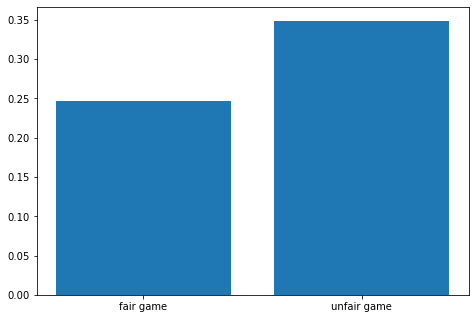

In [4]:
"""
Create a fair coin (with faces H and T)
and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
"""
fair_die = Die(["H", "T"])
unfair_die = Die(["H", "T"])
unfair_die.change_weight("H", 5)

# Play a game of 1000 flips with all fair dice.
fair_game = Game([fair_die, fair_die, fair_die]) 
fair_game.play(1000)

# Play a game of 1000 flips with two unfair dice and one fair die.
unfair_game = Game([unfair_die, unfair_die, fair_die]) 
unfair_game.play(1000)

# For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)
relative_freq_jackpot = fair_analyzer.jackpot() / unfair_analyzer.jackpot()

# Compute relative frequency as the number of jackpots over the total number of rolls.
relative_freq_jackpot_rolls_fair = fair_analyzer.jackpot() / 1000
relative_freq_jackpot_rolls_unfair = unfair_analyzer.jackpot() / 1000

# Show your results, comparing the two relative frequencies, in a simple bar chart.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
games = ["fair game", "unfair game"]
freq = [relative_freq_jackpot_rolls_fair, relative_freq_jackpot_rolls_unfair]
ax.bar(games, freq)
plt.show()

## Scenario 2

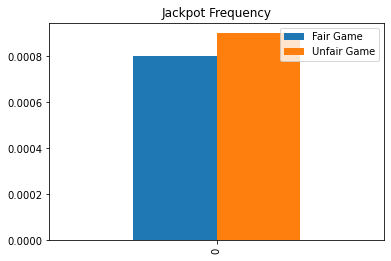

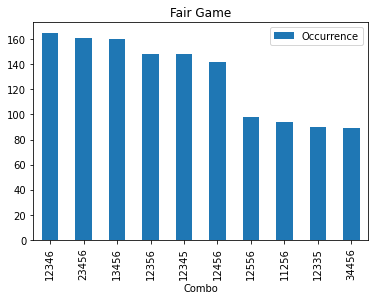

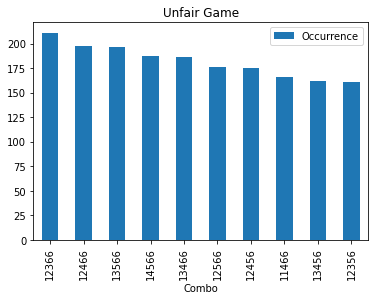

In [5]:
"""
Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. 
One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). 
The other unfair die (Type 2) will  weight 1 five times more than the others.
"""
fair_die_six_sides = Die([1,2,3,4,5,6])
unfair_die_six_sides_1 = Die([1,2,3,4,5,6])
unfair_die_six_sides_1.change_weight(6, 5)
unfair_die_six_sides_2 = Die([1,2,3,4,5,6])
unfair_die_six_sides_2.change_weight(1, 5)

# Play a game of 10000 rolls with 5 fair dice.
fair_game_six_sides = Game([fair_die_six_sides, fair_die_six_sides, fair_die_six_sides, fair_die_six_sides, fair_die_six_sides])
fair_game_six_sides.play(10000)

# Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
unfair_game_six_sides = Game([unfair_die_six_sides_1, unfair_die_six_sides_1, unfair_die_six_sides_2, fair_die_six_sides, fair_die_six_sides])
unfair_game_six_sides.play(10000)

# For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
fair_analyzer_six_sides = Analyzer(fair_game_six_sides)
unfair_analyzer_six_sides = Analyzer(unfair_game_six_sides)
fair_analyzer_six_sides_jackpot_freq = fair_analyzer_six_sides.jackpot() / 10000
unfair_analyzer_six_sides_jackpot_freq = unfair_analyzer_six_sides.jackpot() / 10000

jackpot_freq = pd.DataFrame({"Fair Game":[fair_analyzer_six_sides_jackpot_freq], "Unfair Game":[unfair_analyzer_six_sides_jackpot_freq]})
jackpot_freq.plot.bar(title="Jackpot Frequency")
plt.show()

# Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.
fair_analyzer_six_sides_combos = fair_analyzer_six_sides.combo()['Occurrence'].nlargest(n=10).reset_index()
fair_analyzer_six_sides_combos["Combo"] = fair_analyzer_six_sides_combos["Face Value #1"].astype(str)+fair_analyzer_six_sides_combos["Face Value #2"].astype(str)+fair_analyzer_six_sides_combos["Face Value #3"].astype(str)+fair_analyzer_six_sides_combos["Face Value #4"].astype(str)+fair_analyzer_six_sides_combos["Face Value #5"].astype(str)
fair_analyzer_six_sides_combos.plot.bar(x="Combo", y="Occurrence", title="Fair Game")
plt.show()

unfair_analyzer_six_sides_combos = unfair_analyzer_six_sides.combo()['Occurrence'].nlargest(n=10).reset_index()
unfair_analyzer_six_sides_combos["Combo"] = unfair_analyzer_six_sides_combos["Face Value #1"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #2"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #3"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #4"].astype(str)+unfair_analyzer_six_sides_combos["Face Value #5"].astype(str)
unfair_analyzer_six_sides_combos.plot.bar(x="Combo", y="Occurrence", title="Unfair Game")
plt.show()

## Scenario 3

In [7]:
# Create a "die" of letters from a to z with weights based on their frequency of usage.
alphabet = [chr(i) for i in range(65, 91)]
alphabet_weights = {"A":8.4966, "B":2.0720, "C":4.5388, "D":3.3844, "E":11.1607, "F":1.8121, "G":2.4705, "H":3.0034, 
                    "I":7.5448, "J":0.1965, "K":1.1016, "L":5.4893, "M":3.0129, "N":6.6544, "O":7.1635, "P":3.1671, 
                    "Q":0.1962, "R":7.5809, "S":5.7351, "T":6.9509, "U":3.6308, "V":1.0074, "W":1.2899, "X":0.2902, 
                    "Y":1.7779, "Z":0.2722}
alphabet_die = Die(alphabet)
for x in alphabet_weights:
    alphabet_die.change_weight(x, alphabet_weights[x])

# Play a game involving 5 of these dice with 1000 rolls.
alphabet_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
alphabet_game.play(1000)

# How many combos can you that look like actual English words? ← NOTE: "combo" here just means resulting sequence, not literally combination as opposed to permutation.
alphabet_analyzer = Analyzer(alphabet_game)
alphabet_combo_df = alphabet_analyzer.combo(permutation=True)
word = []
for i in range(1000):
    word.append("".join(list(alphabet_combo_df.iloc[i].name)))
np.array(word)
# Based on your eye count, what is the relative frequency of these words versus the rest?
# There were 3 words within the 1000 rolls; the frequency is 0.3%

array(['AAANR', 'AADRI', 'AAFIT', 'AALBL', 'AANUE', 'AASLO', 'AAZIA',
       'ABRPE', 'ACNHI', 'ACPBL', 'ACUEI', 'ADIAL', 'ADRTK', 'AEARC',
       'AEIDN', 'AELBN', 'AELGI', 'AENLM', 'AEOOI', 'AESCS', 'AETSR',
       'AFDBE', 'AFMOI', 'AFRTN', 'AGHNT', 'AGMCM', 'AHEEH', 'AHITI',
       'AHNNG', 'AHSIA', 'AIAHR', 'AIAIE', 'AIMOT', 'AIOEJ', 'AISIH',
       'AITSY', 'AIUIZ', 'AJVCP', 'ALBTR', 'ALRHB', 'ALSZO', 'ALWNO',
       'ANAWA', 'ANDRO', 'ANERE', 'ANODN', 'ANOTA', 'ANRGS', 'ANSPM',
       'AOARD', 'AOELU', 'AOERI', 'AOREU', 'AOSMI', 'AOSRD', 'AOUNN',
       'APHED', 'APMNR', 'APRNA', 'ARAHF', 'ARCBO', 'ARCBT', 'ARHRA',
       'ARIOL', 'ARRVE', 'ARTRI', 'ASEOE', 'ASFFI', 'ASHOT', 'ASRIR',
       'ASTSR', 'ATADR', 'ATAEO', 'ATLRI', 'ATRZO', 'AUOCT', 'AURAN',
       'AUSAG', 'AVLRY', 'AWLUE', 'AWMOS', 'AYRPO', 'BACHL', 'BAORA',
       'BARTI', 'BCEIE', 'BDOUA', 'BDUNA', 'BEHST', 'BELEU', 'BETHE',
       'BFNGI', 'BFUDI', 'BGBLC', 'BHFAN', 'BHPDD', 'BICME', 'BIHTL',
       'BISEE', 'BLS

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [1]:
!ls -lRF -o

total 352
-rw-r--r--  1 amikano  85700 Jul 15 08:54 FinalProjectSubmission.ipynb
-rw-r--r--  1 amikano   1065 Jul 13 14:13 LICENSE
drwxr-xr-x  6 amikano    192 Jul 13 22:46 Monte_Carlo_Simulator.egg-info/
-rw-r--r--  1 amikano   1002 Jul 14 11:57 Montecarlo_test_results.txt
-rw-r--r--@ 1 amikano   1139 Jul 14 09:21 README.md
drwxr-xr-x  5 amikano    160 Jul 13 14:07 __pycache__/
drwxr-xr-x  7 amikano    224 Jul 14 19:58 montecarlo/
-rw-r--r--  1 amikano  59066 Jul 13 23:17 montecarlo_demo.ipynb
-rw-r--r--@ 1 amikano   6369 Jul 15 08:54 montecarlo_tests.py
-rw-r--r--@ 1 amikano    376 Jul 13 14:14 setup.py
-rw-r--r--  1 amikano   5761 Jul  9 16:40 simulator_classes.pyc

./Monte_Carlo_Simulator.egg-info:
total 32
-rw-r--r--  1 amikano  318 Jul 13 22:46 PKG-INFO
-rw-r--r--  1 amikano  254 Jul 13 22:46 SOURCES.txt
-rw-r--r--  1 amikano    1 Jul 13 22:46 dependency_links.txt
-rw-r--r--  1 amikano   11 Jul 13 22:46 top_level.txt

./__pycache__:
total 48
-rw-r--r--  1 amikano  9424 Jul 13 14:

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [9]:
!pip install .

Processing /Users/amikano/Documents/MSDS/DS5100/Monte_Carlo_Simulator
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for Monte-Carlo-Simulator: filename=Monte_Carlo_Simulator-0.1-py3-none-any.whl size=4633 sha256=046bdc642fd5cbef1e5bca77ca886027d2b840d9729c028fad0513c75e6d5d22
  Stored in directory: /private/var/folders/fz/w6ggb67x2gj04ph736q3_nnm0000gn/T/pip-ephem-wheel-cache-ba0ic2n5/wheels/09/07/93/0f02a2853d12ee799896c024be84a1804f01b95f2f6e0f09a9
Successfully built Monte-Carlo-Simulator
  Attempting uninstall: Monte-Carlo-Simulator
    Found existing installation: Monte-Carlo-Simulator 0.1
    Uninstalling Monte-Carlo-Simu